In [2]:
import numpy as np
import sklearn as sk
import random
import matplotlib.pyplot as plt

In [3]:
import torch
import torchvision            
import torch.nn as nn

print(torch.__version__)

1.7.0+cu101


In [4]:
np.random.seed(12)
data_1_x = np.random.uniform(-1,0,10000)
data_1_y = np.random.uniform(-1,0,10000)
data_1_label = np.zeros(10000)
data_1 = np.column_stack( (data_1_x, data_1_y))

data_2_x = np.random.uniform(-1,0,10000)
data_2_y = np.random.uniform(0,1,10000)
data_2_label = np.ones(10000)
data_2 = np.column_stack( (data_2_x, data_2_y))

data_3_x = np.random.uniform(0,1,10000)
data_3_y = np.random.uniform(-1,0,10000)
data_3_label = np.ones(10000)
data_3 = np.column_stack( (data_3_x, data_3_y))

data_4_x = np.random.uniform(0,1,10000)
data_4_y = np.random.uniform(0,1,10000)
data_4_label = np.zeros(10000)
data_4 = np.column_stack( (data_4_x, data_4_y))

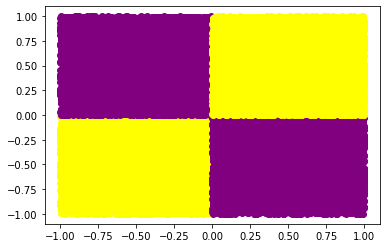

In [5]:
plt.scatter(data_1_x, data_1_y, color='yellow', label="class 0")
plt.scatter(data_2_x, data_2_y, color='purple', label="class 1")
plt.scatter(data_3_x, data_3_y, color='purple', label="class 1")
plt.scatter(data_4_x, data_4_y, color='yellow', label="class 0")

In [6]:
data_x = np.row_stack((data_1_x, data_2_x, data_3_x, data_4_x))
data_y = np.row_stack((data_1_y, data_2_y, data_3_y, data_4_y))
data_label = np.row_stack((data_1_label, data_2_label, data_3_label, data_4_label))
data = np.column_stack((data_x, data_y))

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,data_label,random_state = 0)

In [8]:
from sklearn.neural_network import MLPClassifier
! pip install mglearn
import mglearn

     |████████████████████████████████| 542kB 5.6MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=d3f15f98326ed709effa4c152649f044625a2938c2aebad3b7e00176e2101c02
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [74]:
mlp = MLPClassifier(random_state = 0, hidden_layer_sizes = [4,4,4,4,3,4]).fit(X_train,y_train)

print("Training accuracy = ", mlp.score(X_train, y_train))
print("Test Accuracy = ", mlp.score(X_test, y_test))

Training accuracy =  1.0
Test Accuracy =  1.0


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [75]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
y_hat = lr.predict(X_test)

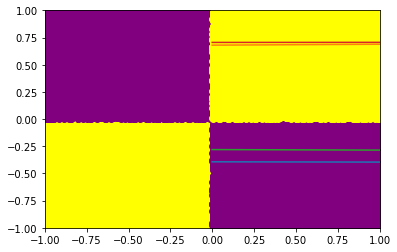

In [92]:
axes = plt.gca()
axes.set_xlim([-1,1])
axes.set_ylim([-1,1])
plt.scatter(data_1_x, data_1_y, color='yellow', label="class 0")
plt.scatter(data_2_x, data_2_y, color='purple', label="class 1")
plt.scatter(data_3_x, data_3_y, color='purple', label="class 1")
plt.scatter(data_4_x, data_4_y, color='yellow', label="class 0")
plt.plot(np.dot(mlp.coefs_[0], mlp.coefs_[1]) + mlp.intercepts_[1])